In [1]:
!pip install h2o

In [4]:
import pandas as pd

In [58]:
import h2o

In [59]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,3 hours 0 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_navee_by5kp4
H2O cluster total nodes:,1
H2O cluster free memory:,2.970 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


In [68]:
dataset = pd.read_csv('../Data/final_data_combined_edulix_yocket.csv')

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
dataset.university_name.value_counts()

university of texas at dallas                  871
northeastern university                        723
north carolina state university, raleigh       701
state university of new york at stony brook    658
university of southern california              595
university of florida                          507
syracuse university                            461
rochester institute of technology              458
indiana university bloomington                 447
san jose state university                      424
university of north carolina at charlotte      414
texas a&m university, college station          401
university of california, irvine               399
university of texas at arlington               377
georgia institute of technology                374
illinois institute of technology               342
rutgers university-new brunswick               336
new york university                            324
george mason university                        257
university of maryland, college

In [71]:
#y=dataset.pop('target')

In [72]:
studentnames=dataset.pop('student_name')

In [73]:
train,test = train_test_split(dataset, test_size=0.2, random_state=0, 
                               stratify=dataset[['university_name', 'status']])

In [74]:
test.groupby(by=['university_name'])['status'].value_counts()

university_name                              status
carnegie mellon university                   Reject     21
                                             Admit      10
clemson university                           Admit      20
                                             Reject     13
george mason university                      Admit      32
                                             Reject     19
georgia institute of technology              Reject     67
                                             Admit       8
illinois institute of technology             Admit      48
                                             Reject     21
indiana university bloomington               Admit      62
                                             Reject     28
kansas state university                      Admit      10
                                             Reject      8
michigan technological university            Admit      22
                                             Reject     10
new 

In [75]:
train.groupby(by=['university_name'])['status'].value_counts()

university_name                              status
carnegie mellon university                   Reject     82
                                             Admit      38
clemson university                           Admit      80
                                             Reject     53
george mason university                      Admit     130
                                             Reject     76
georgia institute of technology              Reject    267
                                             Admit      32
illinois institute of technology             Admit     191
                                             Reject     82
indiana university bloomington               Admit     246
                                             Reject    111
kansas state university                      Admit      40
                                             Reject     33
michigan technological university            Admit      89
                                             Reject     38
new 

In [76]:
train.to_csv('../Data/train.csv',index=False)
test.to_csv('../Data/test.csv',index=False)

In [77]:
train['status']

3674     Reject
8105     Reject
5329      Admit
8932     Reject
2141      Admit
666       Admit
2953     Reject
2261     Reject
8209     Reject
4729      Admit
7712      Admit
10229    Reject
495       Admit
4960      Admit
8326     Reject
9638     Reject
5825      Admit
2399      Admit
419      Reject
9173     Reject
5368      Admit
2267      Admit
32       Reject
5116      Admit
4948     Reject
6438      Admit
4857     Reject
610      Reject
9423     Reject
5566      Admit
          ...  
4924     Reject
8838     Reject
3319      Admit
7118      Admit
9280     Reject
4870     Reject
8160     Reject
2570     Reject
3528      Admit
6905      Admit
2271      Admit
5700      Admit
2067      Admit
460      Reject
9844     Reject
9989     Reject
72        Admit
6989      Admit
9087     Reject
2444     Reject
546       Admit
4721      Admit
4766      Admit
127      Reject
807       Admit
9741     Reject
4883     Reject
6233      Admit
6341      Admit
3713     Reject
Name: status, Length: 82

In [78]:
train_frame= h2o.import_file('../Data/train.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [79]:
training_columns=train.columns.tolist()
response_column='status'

In [80]:
training_columns

['gre_score',
 'gre_score_quant',
 'gre_score_verbal',
 'ranking',
 'status',
 'term_applying',
 'test_score_toefl',
 'undergraduation_score',
 'university_name',
 'work_ex',
 'year_applying']

In [81]:
from h2o.automl import H2OAutoML

In [82]:
model = H2OAutoML(max_models=20, seed=1)
model.train(x=training_columns, y=response_column, training_frame=train_frame)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [83]:
model.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190417_022739,0.99592,0.0868424,0.0340197,0.158721,0.0251925
StackedEnsemble_BestOfFamily_AutoML_20190417_022739,0.9957,0.0914337,0.0348355,0.161147,0.0259684
GBM_1_AutoML_20190417_022739,0.995098,0.0922171,0.0357076,0.162281,0.0263351
GBM_2_AutoML_20190417_022739,0.99476,0.0929032,0.0354136,0.1629,0.0265363
GBM_3_AutoML_20190417_022739,0.994692,0.0930832,0.0364572,0.163984,0.0268906
GBM_4_AutoML_20190417_022739,0.994622,0.0934463,0.0358717,0.164667,0.0271153
GBM_5_AutoML_20190417_022739,0.994253,0.10987,0.0402788,0.173613,0.0301413
GBM_grid_1_AutoML_20190417_022739_model_4,0.993801,0.139251,0.0427775,0.186092,0.0346303
GBM_grid_1_AutoML_20190417_022739_model_5,0.993471,0.436766,0.0420843,0.356643,0.127194
GBM_grid_1_AutoML_20190417_022739_model_1,0.993269,0.131797,0.0437476,0.184411,0.0340073


In [101]:
model_path = h2o.save_model(model=model.leader, path="/Users/navee/OneDrive/Desktop/Spring2019/INFO6105DataSciEng/UniversityFinderFinalProject/Machine-Learning-Model-for-Graduate-Admission/H2oModels_30", force=True)

In [102]:
model_path

'C:\\Users\\navee\\OneDrive\\Desktop\\Spring2019\\INFO6105DataSciEng\\UniversityFinderFinalProject\\Machine-Learning-Model-for-Graduate-Admission\\H2oModels_30\\StackedEnsemble_AllModels_AutoML_20190417_022739'

In [87]:
saved_model = h2o.load_model(model_path)

In [88]:
saved_model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20190417_022739
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.006650094108977692
RMSE: 0.08154810916862323
LogLoss: 0.029195876769615162
Null degrees of freedom: 8287
Residual degrees of freedom: 8281
Null deviance: 11448.140159160968
Residual deviance: 483.9508533331408
AIC: 497.9508533331408
AUC: 0.9997624201529511
pr_auc: 0.8325012526016204
Gini: 0.9995248403059023
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6466208343275194: 


,Admit,Reject,Error,Rate
Admit,4414.0,23.0,0.0052,(23.0/4437.0)
Reject,37.0,3814.0,0.0096,(37.0/3851.0)
Total,4451.0,3837.0,0.0072,(60.0/8288.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6466208,0.9921956,170.0
max f2,0.4521499,0.9939884,206.0
max f0point5,0.7349788,0.9939238,151.0
max accuracy,0.6466208,0.9927606,170.0
max precision,0.9964969,1.0,0.0
max recall,0.0950451,1.0,310.0
max specificity,0.9964969,1.0,0.0
max absolute_mcc,0.6466208,0.9854507,170.0
max min_per_class_accuracy,0.5660349,0.9922098,181.0
max mean_per_class_accuracy,0.6466208,0.9926042,170.0


Gains/Lift Table: Avg response rate: 46.46 %, avg score: 46.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100145,0.9965495,2.1521683,2.1521683,1.0,0.9965598,1.0,0.9965598,0.0215528,0.0215528,115.2168268,115.2168268
,2,0.0200290,0.9965355,2.1521683,2.1521683,1.0,0.9965434,1.0,0.9965516,0.0215528,0.0431057,115.2168268,115.2168268
,3,0.0300434,0.9965200,2.1521683,2.1521683,1.0,0.9965277,1.0,0.9965436,0.0215528,0.0646585,115.2168268,115.2168268
,4,0.0400579,0.9964994,2.1521683,2.1521683,1.0,0.9965098,1.0,0.9965352,0.0215528,0.0862114,115.2168268,115.2168268
,5,0.0500724,0.9964791,2.1521683,2.1521683,1.0,0.9964896,1.0,0.9965261,0.0215528,0.1077642,115.2168268,115.2168268
,6,0.1000241,0.9963246,2.1521683,2.1521683,1.0,0.9964094,1.0,0.9964678,0.1075045,0.2152688,115.2168268,115.2168268
,7,0.1500965,0.9960751,2.1521683,2.1521683,1.0,0.9962097,1.0,0.9963817,0.1077642,0.3230330,115.2168268,115.2168268
,8,0.2000483,0.9956810,2.1521683,2.1521683,1.0,0.9958857,1.0,0.9962578,0.1075045,0.4305375,115.2168268,115.2168268
,9,0.3000724,0.9943206,2.1521683,2.1521683,1.0,0.9950946,1.0,0.9958701,0.2152688,0.6458063,115.2168268,115.2168268
,10,0.3999759,0.9852585,2.1521683,2.1521683,1.0,0.9917275,1.0,0.9948354,0.2150091,0.8608154,115.2168268,115.2168268




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.025192487431682415
RMSE: 0.15872141453402694
LogLoss: 0.08684242384178083
Null degrees of freedom: 8287
Residual degrees of freedom: 8280
Null deviance: 11448.75002984357
Residual deviance: 1439.500017601359
AIC: 1455.500017601359
AUC: 0.9959204096100127
pr_auc: 0.9689629909710593
Gini: 0.9918408192200254
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3658115371012105: 


,Admit,Reject,Error,Rate
Admit,4263.0,174.0,0.0392,(174.0/4437.0)
Reject,111.0,3740.0,0.0288,(111.0/3851.0)
Total,4374.0,3914.0,0.0344,(285.0/8288.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3658115,0.9632968,229.0
max f2,0.1117907,0.9755536,308.0
max f0point5,0.8496097,0.9730974,102.0
max accuracy,0.4859327,0.9658542,198.0
max precision,0.9972485,1.0,0.0
max recall,0.0077947,1.0,383.0
max specificity,0.9972485,1.0,0.0
max absolute_mcc,0.4859327,0.9313602,198.0
max min_per_class_accuracy,0.4399963,0.9646845,211.0
max mean_per_class_accuracy,0.3658115,0.9659803,229.0


Gains/Lift Table: Avg response rate: 46.46 %, avg score: 46.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100145,0.9972023,2.1521683,2.1521683,1.0,0.9972713,1.0,0.9972713,0.0215528,0.0215528,115.2168268,115.2168268
,2,0.0200290,0.9970888,2.1521683,2.1521683,1.0,0.9971448,1.0,0.9972080,0.0215528,0.0431057,115.2168268,115.2168268
,3,0.0300434,0.9970136,2.1521683,2.1521683,1.0,0.9970501,1.0,0.9971554,0.0215528,0.0646585,115.2168268,115.2168268
,4,0.0400579,0.9969280,2.1521683,2.1521683,1.0,0.9969675,1.0,0.9971084,0.0215528,0.0862114,115.2168268,115.2168268
,5,0.0500724,0.9968306,2.1521683,2.1521683,1.0,0.9968837,1.0,0.9970635,0.0215528,0.1077642,115.2168268,115.2168268
,6,0.1000241,0.9958193,2.1521683,2.1521683,1.0,0.9963279,1.0,0.9966961,0.1075045,0.2152688,115.2168268,115.2168268
,7,0.1500965,0.9952278,2.1521683,2.1521683,1.0,0.9954997,1.0,0.9962970,0.1077642,0.3230330,115.2168268,115.2168268
,8,0.2000483,0.9946181,2.1521683,2.1521683,1.0,0.9949428,1.0,0.9959589,0.1075045,0.4305375,115.2168268,115.2168268
,9,0.3000724,0.9917470,2.1521683,2.1521683,1.0,0.9934574,1.0,0.9951250,0.2152688,0.6458063,115.2168268,115.2168268
,10,0.3999759,0.9671087,2.1157789,2.1430792,0.9830918,0.9848569,0.9957768,0.9925603,0.2113737,0.8571800,111.5778949,114.3079171


In [89]:
test_frame= h2o.import_file('../Data/test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [90]:
predictions=saved_model.predict(test_frame)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [91]:
predictions.as_data_frame()

,predict,Admit,Reject
0,Admit,0.993574,0.006426
1,Admit,0.995069,0.004931
2,Reject,0.007108,0.992892
3,Admit,0.746721,0.253279
4,Admit,0.992875,0.007125
5,Admit,0.991546,0.008454
6,Admit,0.993565,0.006435
7,Reject,0.003572,0.996428
8,Admit,0.989021,0.010979
9,Admit,0.991714,0.008286


In [92]:
test

,gre_score,gre_score_quant,gre_score_verbal,ranking,status,term_applying,test_score_toefl,undergraduation_score,university_name,work_ex,year_applying
5457,326.0,179.0,147,97,Admit,Fall,113.00,2.98,illinois institute of technology,1.0,2019
600,310.0,161.0,149,15,Admit,Spring,106.00,2.27,northeastern university,12.0,2014
3660,315.0,168.0,147,97,Reject,Spring,89.00,2.72,illinois institute of technology,13.0,2014
7440,318.0,164.0,154,31,Admit,Fall,103.00,3.50,"texas a&m university, college station",18.0,2019
5850,316.0,164.0,152,19,Admit,Fall,104.00,3.68,university of southern california,20.0,2019
1685,312.0,162.0,150,35,Admit,Fall,106.00,3.45,state university of new york at stony brook,15.5,2014
1507,329.0,170.0,159,35,Admit,Fall,106.00,2.83,state university of new york at stony brook,15.5,2013
1946,311.0,158.0,153,30,Reject,Fall,106.00,2.96,"north carolina state university, raleigh",18.0,2015
5621,313.0,165.0,148,117,Admit,Fall,96.00,3.23,michigan technological university,0.0,2016
5132,322.0,164.0,158,31,Admit,Fall,107.00,3.43,"texas a&m university, college station",17.5,2013


In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
test_cm = confusion_matrix(test['status'], predictions.as_data_frame()['predict'],labels=['Admit','Reject'])
test_cm

array([[1063,   45],
       [  28,  937]], dtype=int64)

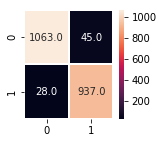

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(test_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [96]:
train_cm = confusion_matrix(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'],labels=['Admit','Reject'])
train_cm

stackedensemble prediction progress: |████████████████████████████████████| 100%


array([[4369,   68],
       [  15, 3836]], dtype=int64)

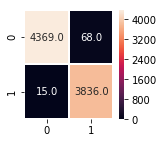

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize=(2, 2))
sns.heatmap(train_cm, annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [98]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(test['status'], predictions.as_data_frame()['predict'])
print('test_accuracy:',test_accuracy)
train_accuracy = accuracy_score(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'])
print('train_accuracy:',train_accuracy)
from sklearn.metrics import f1_score
test_f1_score = f1_score(test['status'], predictions.as_data_frame()['predict'],pos_label='Admit')
print('test_f1_score:',test_f1_score)
train_f1_score = f1_score(train['status'], saved_model.predict(train_frame).as_data_frame()['predict'],pos_label='Admit')
print('train_f1_score:',train_f1_score)

test_accuracy: 0.964785335262904
stackedensemble prediction progress: |████████████████████████████████████| 100%
train_accuracy: 0.9899855212355212
test_f1_score: 0.9668030923146885
stackedensemble prediction progress: |████████████████████████████████████| 100%
train_f1_score: 0.9905906359823149


stackedensemble prediction progress: |████████████████████████████████████| 100%


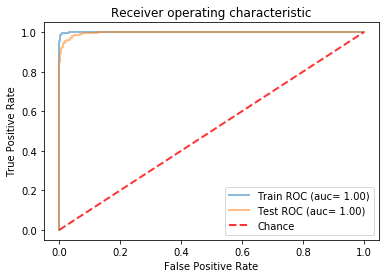

In [99]:
#test and train roc
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
test_fpr,test_tpr,test_thresholds = metrics.roc_curve(test['status'], predictions.as_data_frame()['Admit'],pos_label='Admit')
test_roc_auc = auc(test_fpr, test_tpr)
train_fpr,train_tpr,train_thresholds = metrics.roc_curve(train['status'], saved_model.predict(train_frame).as_data_frame()['Admit'],pos_label='Admit')
train_roc_auc = auc(train_fpr, train_tpr)
plt.plot(train_fpr, train_tpr, lw=2, alpha=0.5,
             label='Train ROC (auc= %0.2f)' % (train_roc_auc))
plt.plot(test_fpr, test_tpr, lw=2, alpha=0.5,
             label='Test ROC (auc= %0.2f)' % (test_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [100]:
predictions.as_data_frame()['predict']

0        Admit
1        Admit
2       Reject
3        Admit
4        Admit
5        Admit
6        Admit
7       Reject
8        Admit
9        Admit
10       Admit
11       Admit
12      Reject
13      Reject
14       Admit
15       Admit
16      Reject
17       Admit
18      Reject
19      Reject
20       Admit
21       Admit
22       Admit
23      Reject
24       Admit
25      Reject
26      Reject
27       Admit
28      Reject
29      Reject
         ...  
2043     Admit
2044     Admit
2045    Reject
2046    Reject
2047     Admit
2048     Admit
2049    Reject
2050     Admit
2051    Reject
2052    Reject
2053     Admit
2054     Admit
2055     Admit
2056     Admit
2057     Admit
2058    Reject
2059     Admit
2060    Reject
2061    Reject
2062     Admit
2063    Reject
2064    Reject
2065     Admit
2066    Reject
2067    Reject
2068    Reject
2069    Reject
2070     Admit
2071    Reject
2072    Reject
Name: predict, Length: 2073, dtype: object